#  Classification avec naive bayes

In [20]:
#recuperer dataset  

import numpy as np
import pandas as pd

df = pd.read_csv('pointure.data', header=0)
df.head()

,Genre,Taille(cm),Poids(kg),Pointure(cm)
0,masculin,182,81.6,30
1,masculin,180,86.2,28
2,masculin,170,77.1,30
3,masculin,180,74.8,25
4,féminin,152,45.4,15


In [21]:
#shape du dataset
df.shape

(8, 4)

In [22]:
#Verifier la présence de NaN
df.isnull().sum()

Genre           0
Taille(cm)      0
Poids(kg)       0
Pointure(cm)    0
dtype: int64

In [23]:
#description stats sur la cible target
df['Genre'].describe()
#Noter que les valeurs statistiques n'ont pas vraiment de signification

count            8
unique           2
top       masculin
freq             4
Name: Genre, dtype: object

In [24]:
#Exploration des descripteurs
df.drop(['Genre'], 1, inplace=False).describe()

,Taille(cm),Poids(kg),Pointure(cm)
count,8.000000,8.000000,8.000000
mean,171.500000,70.012500,23.625000
std,10.028531,13.118192,5.629958
min,152.000000,45.400000,15.000000
25%,167.250000,65.750000,19.500000
50%,172.500000,71.400000,24.000000
75%,180.000000,78.225000,28.500000
max,182.000000,86.200000,30.000000


In [25]:
#nettoyer
df.replace('?', -99999, inplace=True)

#former X et y
X = np.array(df.drop(['Genre'],1))
print(X)
y = np.array(df['Genre'])
print(y)

[[ 182.    81.6   30. ]
 [ 180.    86.2   28. ]
 [ 170.    77.1   30. ]
 [ 180.    74.8   25. ]
 [ 152.    45.4   15. ]
 [ 168.    68.    20. ]
 [ 165.    59.    18. ]
 [ 175.    68.    23. ]]
['masculin' 'masculin' 'masculin' 'masculin' 'féminin' 'féminin' 'féminin'
 'féminin']


In [26]:
#separer
from sklearn import preprocessing, model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state=44 )
#creer le classifier
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

#score Accuracy
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.5


In [34]:
#Afficher les sommaires
from sklearn import metrics
y_pred= clf.predict(X_test) 
print(metrics.classification_report(y_test, y_pred))
print("Matrice de confusion")
print(metrics.confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

    féminin       0.50      1.00      0.67         1
   masculin       0.00      0.00      0.00         1

avg / total       0.25      0.50      0.33         2

Matrice de confusion
[[1 0]
 [1 0]]


C:\Users\HBenteftifa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
#test
data_eval = np.array([183,59,20])
data_eval = data_eval.reshape(1, -1)
prediction = clf.predict(data_eval)
print(prediction)

['féminin']


In [37]:
#Afficher les probabilités
p = clf.predict_proba(data_eval) 
print(p)

[[  9.99999781e-01   2.18972790e-07]]


In [29]:
#Mesures et métriques Génériques
from sklearn import metrics 
y_pred = clf.predict(X_test) 
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred) ) 
print ("Precision:", metrics.precision_score(y_test, y_pred, average="weighted") )
print ("Recall:", metrics.recall_score(y_test, y_pred, average="weighted") )
print ("F1 score:", metrics.f1_score(y_test, y_pred, average="weighted") )

Accuracy: 0.5
Precision: 0.25
Recall: 0.5
F1 score: 0.333333333333


C:\Users\HBenteftifa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HBenteftifa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Etape 2: matrice de correlation et distribution

In [30]:
df = pd.read_csv('pointure.data', header=0)
df.head()


,Genre,Taille(cm),Poids(kg),Pointure(cm)
0,masculin,182,81.6,30
1,masculin,180,86.2,28
2,masculin,170,77.1,30
3,masculin,180,74.8,25
4,féminin,152,45.4,15


In [31]:
# Import LabelEncoder
from sklearn import preprocessing
#creation labelEncoder
le = preprocessing.LabelEncoder()
# Convertir Genre en numerique
genre = ['masculin', 'masculin' ,'masculin', 'masculin', 'féminin', 'féminin', 'féminin',
 'féminin']
genre_encode=le.fit_transform(genre)
print(genre_encode)

[1 1 1 1 0 0 0 0]


In [32]:
#reformer le dataframe avec le genre encodé
#former X et y
X = np.array(df.drop(['Genre'],1))
print(X)
df['Genre'] = pd.Series(genre_encode)
df.head()

[[ 182.    81.6   30. ]
 [ 180.    86.2   28. ]
 [ 170.    77.1   30. ]
 [ 180.    74.8   25. ]
 [ 152.    45.4   15. ]
 [ 168.    68.    20. ]
 [ 165.    59.    18. ]
 [ 175.    68.    23. ]]


,Genre,Taille(cm),Poids(kg),Pointure(cm)
0,1,182,81.6,30
1,1,180,86.2,28
2,1,170,77.1,30
3,1,180,74.8,25
4,0,152,45.4,15


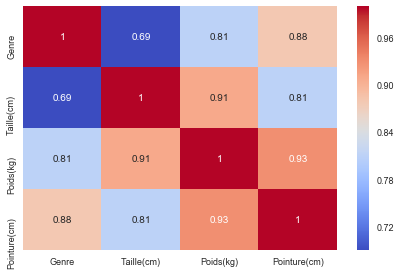

In [33]:
#Calculer la matrice de corrélation
#correlation entre les différents éléments du dataset
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", font_scale = 0.9)
sns.heatmap(data= df.corr().round(2), cmap='coolwarm', annot=True,
annot_kws={"size":10} )
plt.tight_layout()
plt.show()